In [1]:
# import package
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

import time
import math

In [2]:
 # load data
time1 = time.time()
print("start reading...")

dataset = pd.read_csv('./data/dataset_new.csv', header=0)

print("end reading")
time2 = time.time()
print("reading cost ",time2 - time1, "s")

start reading...
end reading
reading cost  31.76483941078186 s


In [3]:
# check information
print(dataset.shape)
dataset.head()

(2175890, 51)


,item_condition_id,price,shipping,test_id,train_id,brand_bool,brand_label,cat1_label,cat2_label,cat_bool,...,subname_10,subname_11,subname_12,subname_13,subname_14,subname_15,subname_16,subname_17,subname_18,subname_19
0,3,10.0,1,NaN,0.0,0,0,1,1,1,...,-0.043068,-0.054080,-0.005593,-0.090010,-0.009460,0.026508,0.024064,-0.007097,-0.042367,-0.000171
1,3,52.0,0,NaN,1.0,1,1,2,2,1,...,-0.000113,0.000157,-0.000103,0.000015,-0.000001,-0.000012,-0.000034,-0.000010,-0.000044,0.000026
2,1,10.0,1,NaN,2.0,1,2,3,3,1,...,-0.000159,-0.003266,0.000844,-0.000820,-0.000521,-0.000137,-0.001059,-0.000080,0.003946,-0.002160
3,1,35.0,1,NaN,3.0,0,0,4,4,1,...,-0.011362,-0.013510,0.002793,-0.002177,0.000622,-0.001707,-0.008709,0.003225,0.023608,0.017805
4,1,44.0,0,NaN,4.0,0,0,3,5,1,...,-0.009359,-0.006795,0.010102,0.001983,-0.000288,0.000131,0.001570,0.010042,0.002580,0.001851


In [6]:
# split dataset to train and test
train = dataset[:1482531]
Y_train = train["price"]
X_train = train.drop(labels=["price","test_id"], axis=1, inplace=False)

test = dataset[1482531:]
test.drop(labels=["price","train_id"], axis=1, inplace=True)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [4]:
# print(X_train.isnull().sum())
# print(Y_train.isnull().sum())
# print(test.isnull().sum())

In [7]:
print(X_train.shape,X_train.index)
print(Y_train.shape,Y_train.index)
print(test.shape,test.index)

(1482531, 49) RangeIndex(start=0, stop=1482531, step=1)
(1482531,) RangeIndex(start=0, stop=1482531, step=1)
(693359, 49) RangeIndex(start=1482531, stop=2175890, step=1)


## 使用交叉验证法进行模型选择

In [8]:
# split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)
print(X1_train.shape,y1_train.shape,X1_test.shape,y1_test.shape)

(1037771, 49) (1037771,) (444760, 49) (444760,)


In [8]:
regressors = []
regressors.append(LinearRegression())
regressors.append(SGDRegressor())
regressors.append(Ridge())
regressors.append(Lars())
regressors.append(PassiveAggressiveRegressor())
regressors.append(ElasticNet())
# regressors.append(KernelRidge())
# regressors.append(GaussianProcessRegressor())
regressors.append(KNeighborsRegressor())
regressors.append(DecisionTreeRegressor())
regressors.append(RandomForestRegressor())
regressors.append(GradientBoostingRegressor())
regressors.append(AdaBoostRegressor())

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [11]:
# modeling
results = []

for reg in regressors:
    time1 = time.time()
    print("modeling...", reg)

    reg.fit(X1_train,y1_train)
    result = reg.predict(X1_test)
    result[result<0] = 0.001
    RMSLE = math.sqrt(mean_squared_log_error(y1_test, result))
    print("the RMSLE  is:", RMSLE)
    results.append(RMSLE)

    time2 = time.time()
    print("it cost ",time2 - time1, "s")


modeling... LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
the RMSLE  is: 0.7643435406055701
it cost  9.680118560791016 s
modeling... SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
the RMSLE  is: 43.6086064192526
it cost  3.3533308506011963 s
modeling... Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
the RMSLE  is: 0.7643276608317192
it cost  7.254590034484863 s
modeling... Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)
the RMSLE  is: 0.7643435406057609
it cost  7.29969334602356 s
modeling... Passiv

results: 
 [0.7643435406055701, 0, 0.7643276608317192, 0.7643435406057609, 2.151052783889033, 0.7963473982878865, 0.8859469205194512, 0.7928287774803959, 0.6475083041382675, 0.6877090850584006, 1.4138998397103455]


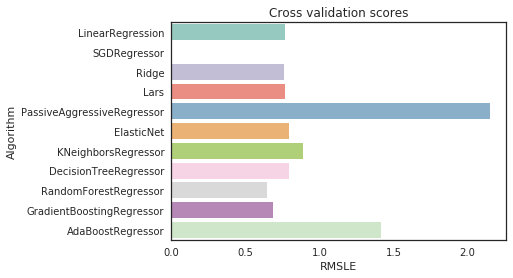

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

results[1]=0
print("results:",'\n',results)

# 画图
cv_res = pd.DataFrame({"RMSLE": results, "Algorithm": ["LinearRegression","SGDRegressor","Ridge",
"Lars","PassiveAggressiveRegressor","ElasticNet","KNeighborsRegressor","DecisionTreeRegressor","RandomForestRegressor","GradientBoostingRegressor","AdaBoostRegressor"]})
g = sns.barplot("RMSLE", "Algorithm", data=cv_res, palette="Set3", orient="h")
g.set_xlabel("RMSLE")
g = g.set_title("Cross validation scores")
plt.show()

In [5]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import make_scorer

def my_score_func(ground_truth, predictions):
    predictions[predictions<0] = 0.001
    return math.sqrt(mean_squared_log_error(ground_truth, predictions))

RMSLE  = make_scorer(my_score_func, greater_is_better=False)

reg = XGBRegressor()
xgb_param_grid = {"learning_rate" : [0.1], 
#                "min_child_weight":[1, 2, 3]
              "max_depth" : [5], 
#               "gamma" :[0.1, 0.2]
                 }

gsXGB = GridSearchCV(reg,  param_grid=xgb_param_grid, cv=2, scoring=RMSLE, n_jobs=4)

print("start fiting...")
gsXGB.fit(X_train, Y_train)
print("fit end")

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


start fiting...
fit end


In [9]:
print(gsXGB.best_estimator_)
print(gsXGB.best_score_)
print(gsXGB.best_params_)
print(gsXGB.cv_results_)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
-0.657533862055
{'max_depth': 5, 'learning_rate': 0.1}
{'split0_test_score': array([-0.65531604]), 'mean_score_time': array([ 3.86311722]), 'std_score_time': array([ 1.36408877]), 'mean_train_score': array([-0.64998308]), 'std_train_score': array([ 0.00056672]), 'rank_test_score': array([1], dtype=int32), 'params': [{'max_depth': 5, 'learning_rate': 0.1}], 'param_learning_rate': masked_array(data = [0.1],
             mask = [False],
       fill_value = ?)
, 'split1_train_score': array([-0.6505498]), 'split1_test_score': array([-0.65975169]), 'std_test_score': array([ 0.00221782]), 'split0_train_score': array([-0.64941636]), 'std_fit_time': array([ 3.94080865]), 'me

In [8]:
from xgboost.sklearn import XGBRegressor

reg = XGBRegressor()

time1 = time.time()
print("modeling...", reg)

reg.fit(X1_train,y1_train)
result = reg.predict(X1_test)
result[result<0] = 0.001

RMSLE = math.sqrt(mean_squared_log_error(y1_test, result))
print("the RMSLE  is:", RMSLE)

time2 = time.time()
print("it cost ",time2 - time1, "s")


modeling... XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
the RMSLE  is: 0.6887359514239281
it cost  154.30808806419373 s


In [10]:
time1 = time.time()
reg = XGBRegressor(max_depth=5)
print("modeling...", reg)

reg.fit(X1_train,y1_train)
result = reg.predict(X1_test)
result[result<0] = 0.001

RMSLE = math.sqrt(mean_squared_log_error(y1_test, result))
print("the RMSLE  is:", RMSLE)

time2 = time.time()
print("it cost ",time2 - time1, "s")

modeling... XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
the RMSLE  is: 0.6505312067538976
it cost  244.38834238052368 s


In [11]:
time1 = time.time()
reg = XGBRegressor(max_depth=5, min_child_weight=3)
print("modeling...", reg)

reg.fit(X1_train,y1_train)
result = reg.predict(X1_test)
result[result<0] = 0.001

RMSLE = math.sqrt(mean_squared_log_error(y1_test, result))
print("the RMSLE  is:", RMSLE)

time2 = time.time()
print("it cost ",time2 - time1, "s")

modeling... XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
the RMSLE  is: 0.6503223267927434
it cost  238.94700121879578 s


In [11]:
import lightgbm as lgb

reg = lgb.LGBMRegressor(objective='regression',
                        num_leaves=31,
                        learning_rate=0.2,
                        max_depth=3,
                        n_estimators=100)

print("modeling...", reg)

reg.fit(X1_train,y1_train)
result = reg.predict(X1_test)
result[result<0] = 0.001

RMSLE = math.sqrt(mean_squared_log_error(y1_test, result))
print("the RMSLE  is:", RMSLE)

time2 = time.time()
print("it cost ",time2 - time1, "s")

modeling... LGBMRegressor(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.2,
       max_depth=3, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)
the RMSLE  is: 0.6833126894808818
it cost  197.8381986618042 s
